In [1]:
import pandas as pd
import matplotlib.pyplot as plt

* Step 1. 데이터 준비

In [2]:
# Wholesale customers 데이터셋 가져오기(출처:UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)

* Step 2. 데이터 탐색

In [3]:
# 데이터 살펴보기
print(df.head())
print('\n') 

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185




In [4]:
# 데이터 자료형 확인
print(df.info())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None




In [5]:
# 데이터 통계 요약 정보 확인
print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


* Step 3. 데이터 전처리

In [6]:
# 분석에 사용할 속성 선택
X = df.iloc[:,:]
print(X[:5])
print('\n')

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185




In [7]:
# 설명 변수 데이터 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
print(X[:5])

[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


* Step4. K-means 군집모형 - sklearn 사용

In [8]:
# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

In [12]:
# 모형 객체 생성
kmeans = cluster.KMeans(init='k-means++',n_clusters=5,n_init=10)

In [13]:
# 모형 학습
kmeans.fit(X)

KMeans(n_clusters=5)

In [15]:
# 예측(군집)
cluster_label = kmeans.labels_
print(cluster_label)
print('\n')

[2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2 1 2 1 2 1 1 4 2 2 1 1 2 1 1 1 1 1 1 2 1
 2 2 1 1 1 2 2 2 2 2 3 2 2 1 1 2 2 1 1 3 2 1 1 2 3 2 2 1 3 1 2 1 1 1 4 1 2
 2 1 1 2 1 1 1 2 2 1 2 3 3 4 1 1 1 1 3 4 2 1 2 1 1 1 2 2 2 4 1 1 2 2 2 2 1
 2 1 1 1 1 1 1 1 1 1 1 1 2 1 4 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 2 2 1 2 2 2 1 1 2 2 2 2 1 1 1 2 2 1 2 1 2 1 1 1 1 1 4 1 4 1
 1 1 1 2 2 1 1 1 2 1 1 0 2 0 0 2 2 0 0 0 2 0 0 0 2 0 3 0 0 2 0 2 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 3 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 2 0 0 0 0 1 1 1 1 1 1 2 1 2 1 1 4 1 1 1 1 1 1 1 1 2 0 2
 0 2 2 0 2 2 2 2 2 2 2 0 0 2 0 0 2 0 0 2 0 0 0 2 0 0 0 0 0 4 0 0 0 0 0 2 0
 3 0 2 0 0 0 0 2 2 1 2 1 1 2 2 1 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1
 2 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 2 2 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1]




In [16]:
# 예측 결과를 데이터 프레임에 추가
df['Cluster'] = cluster_label
print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        2  
1        1776        2  
2        7844        2  
3        1788        1  
4        5185        2  


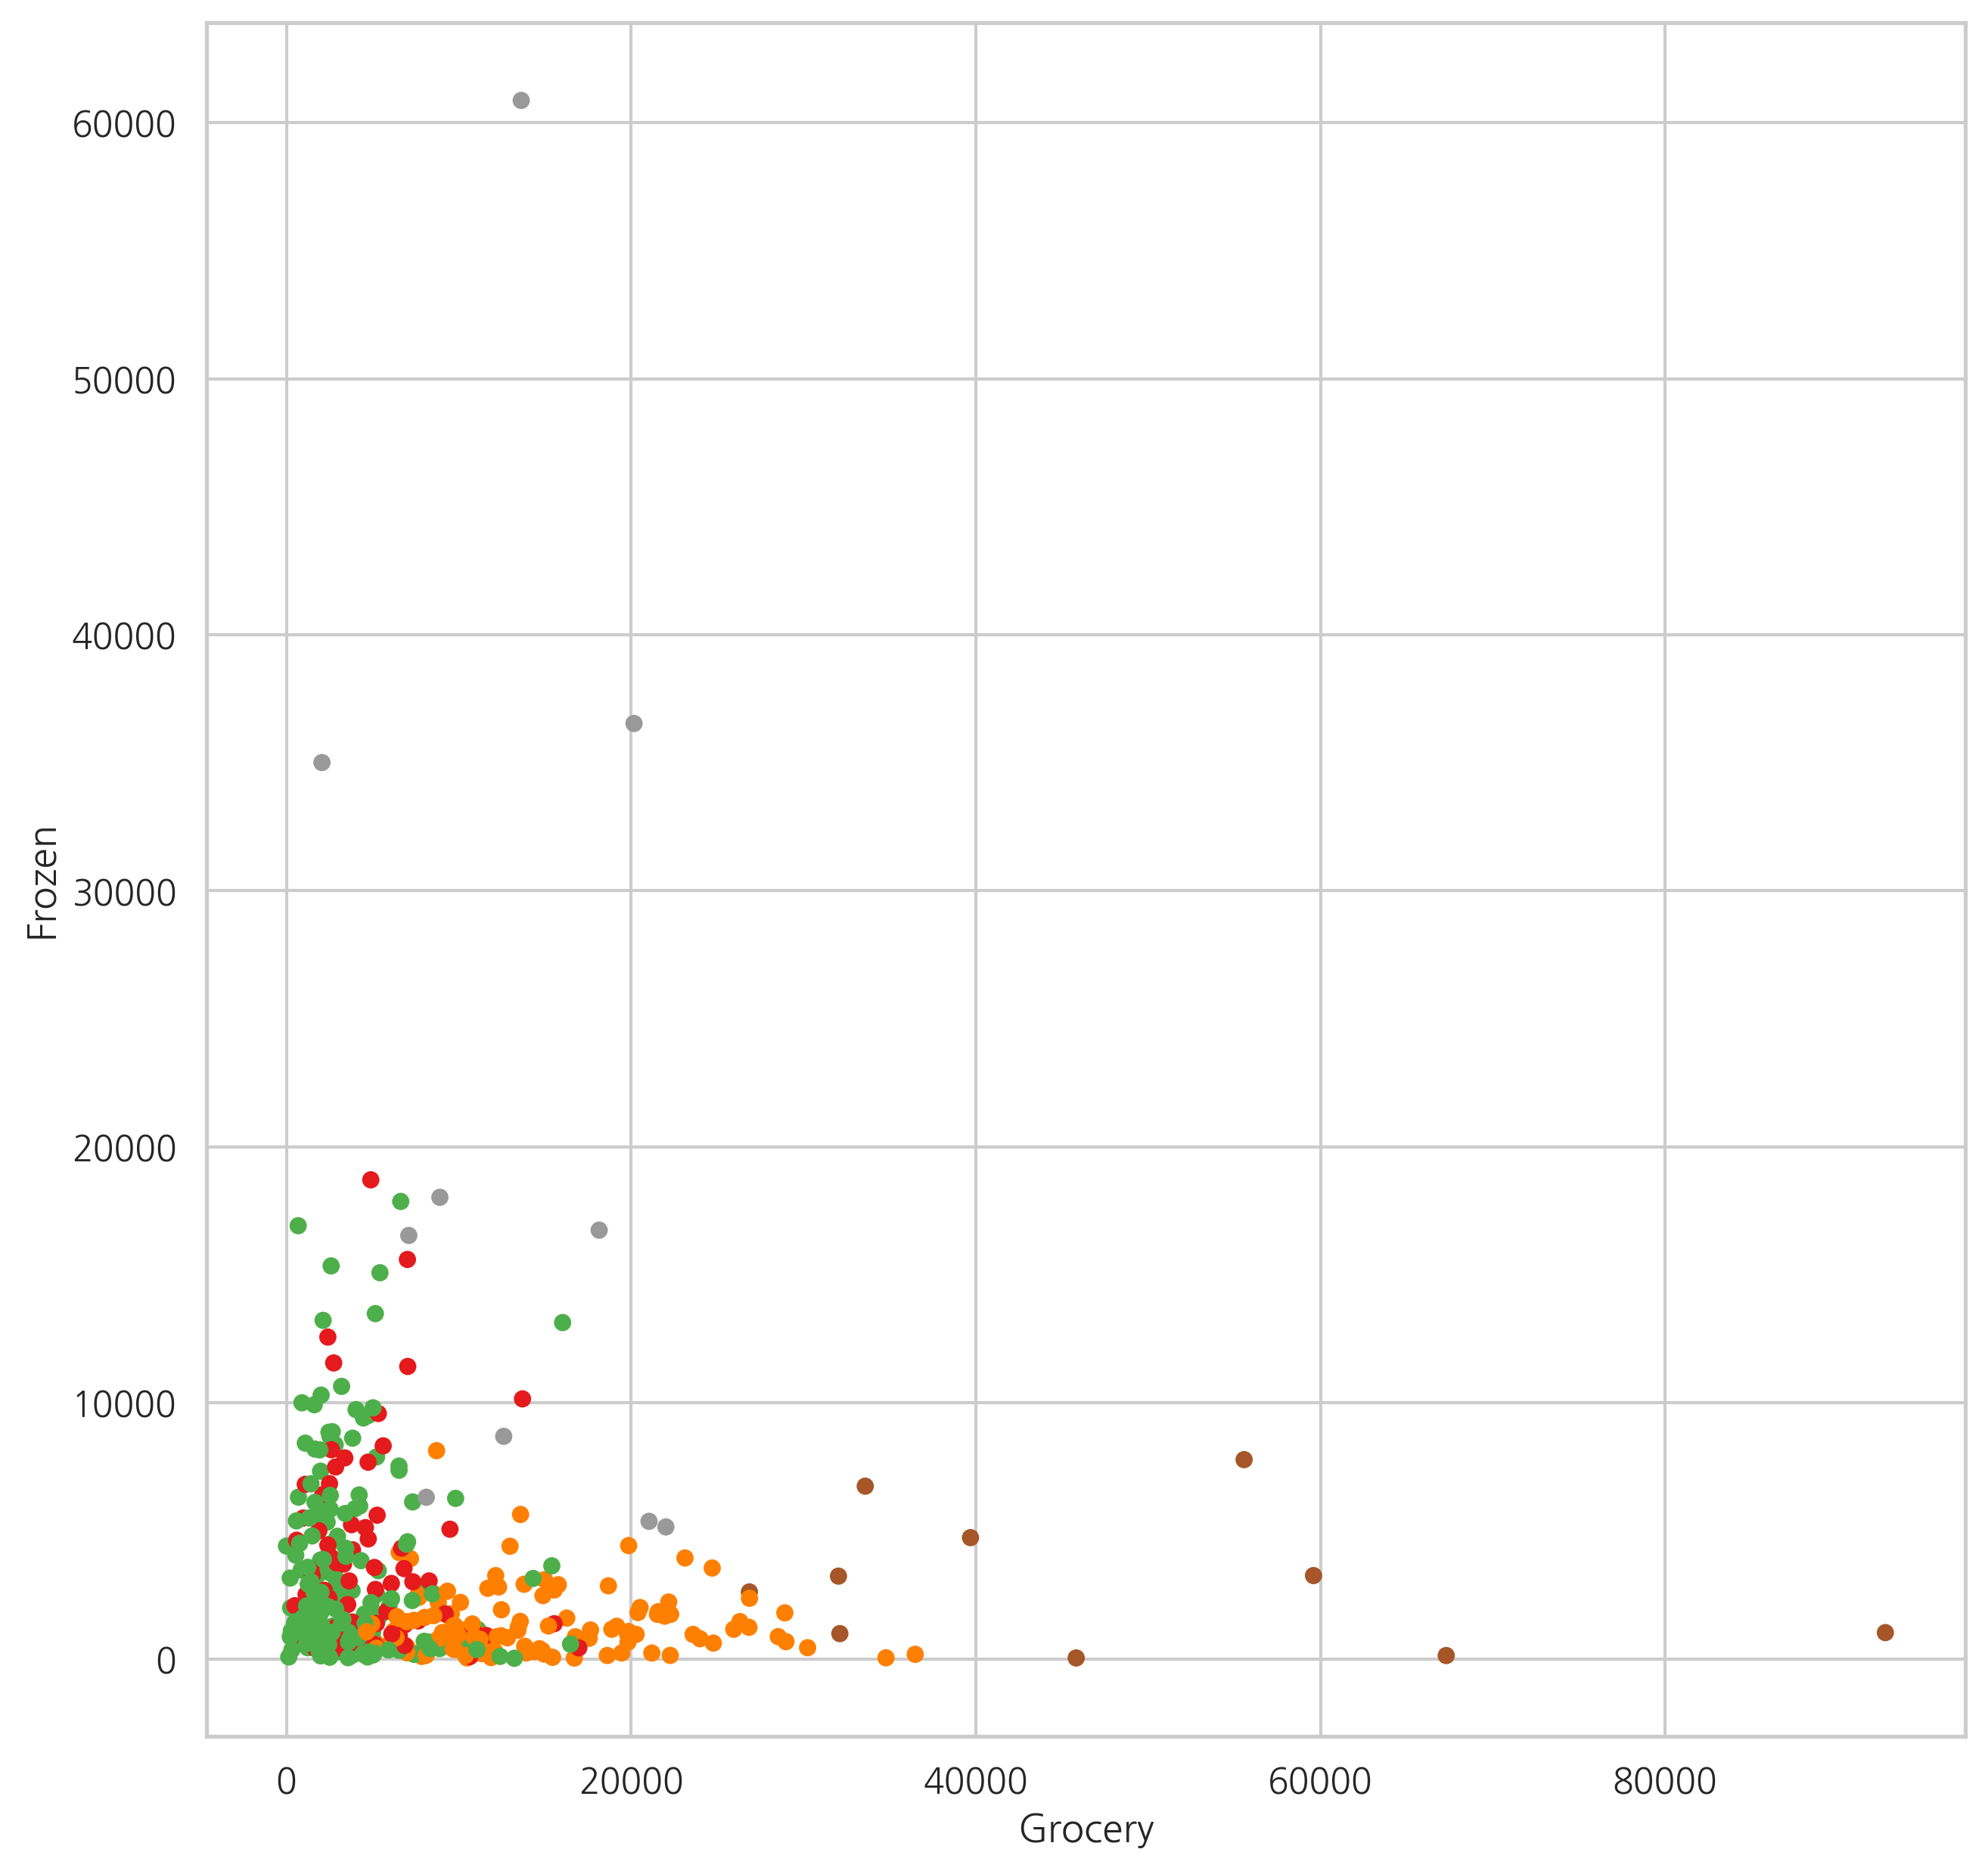

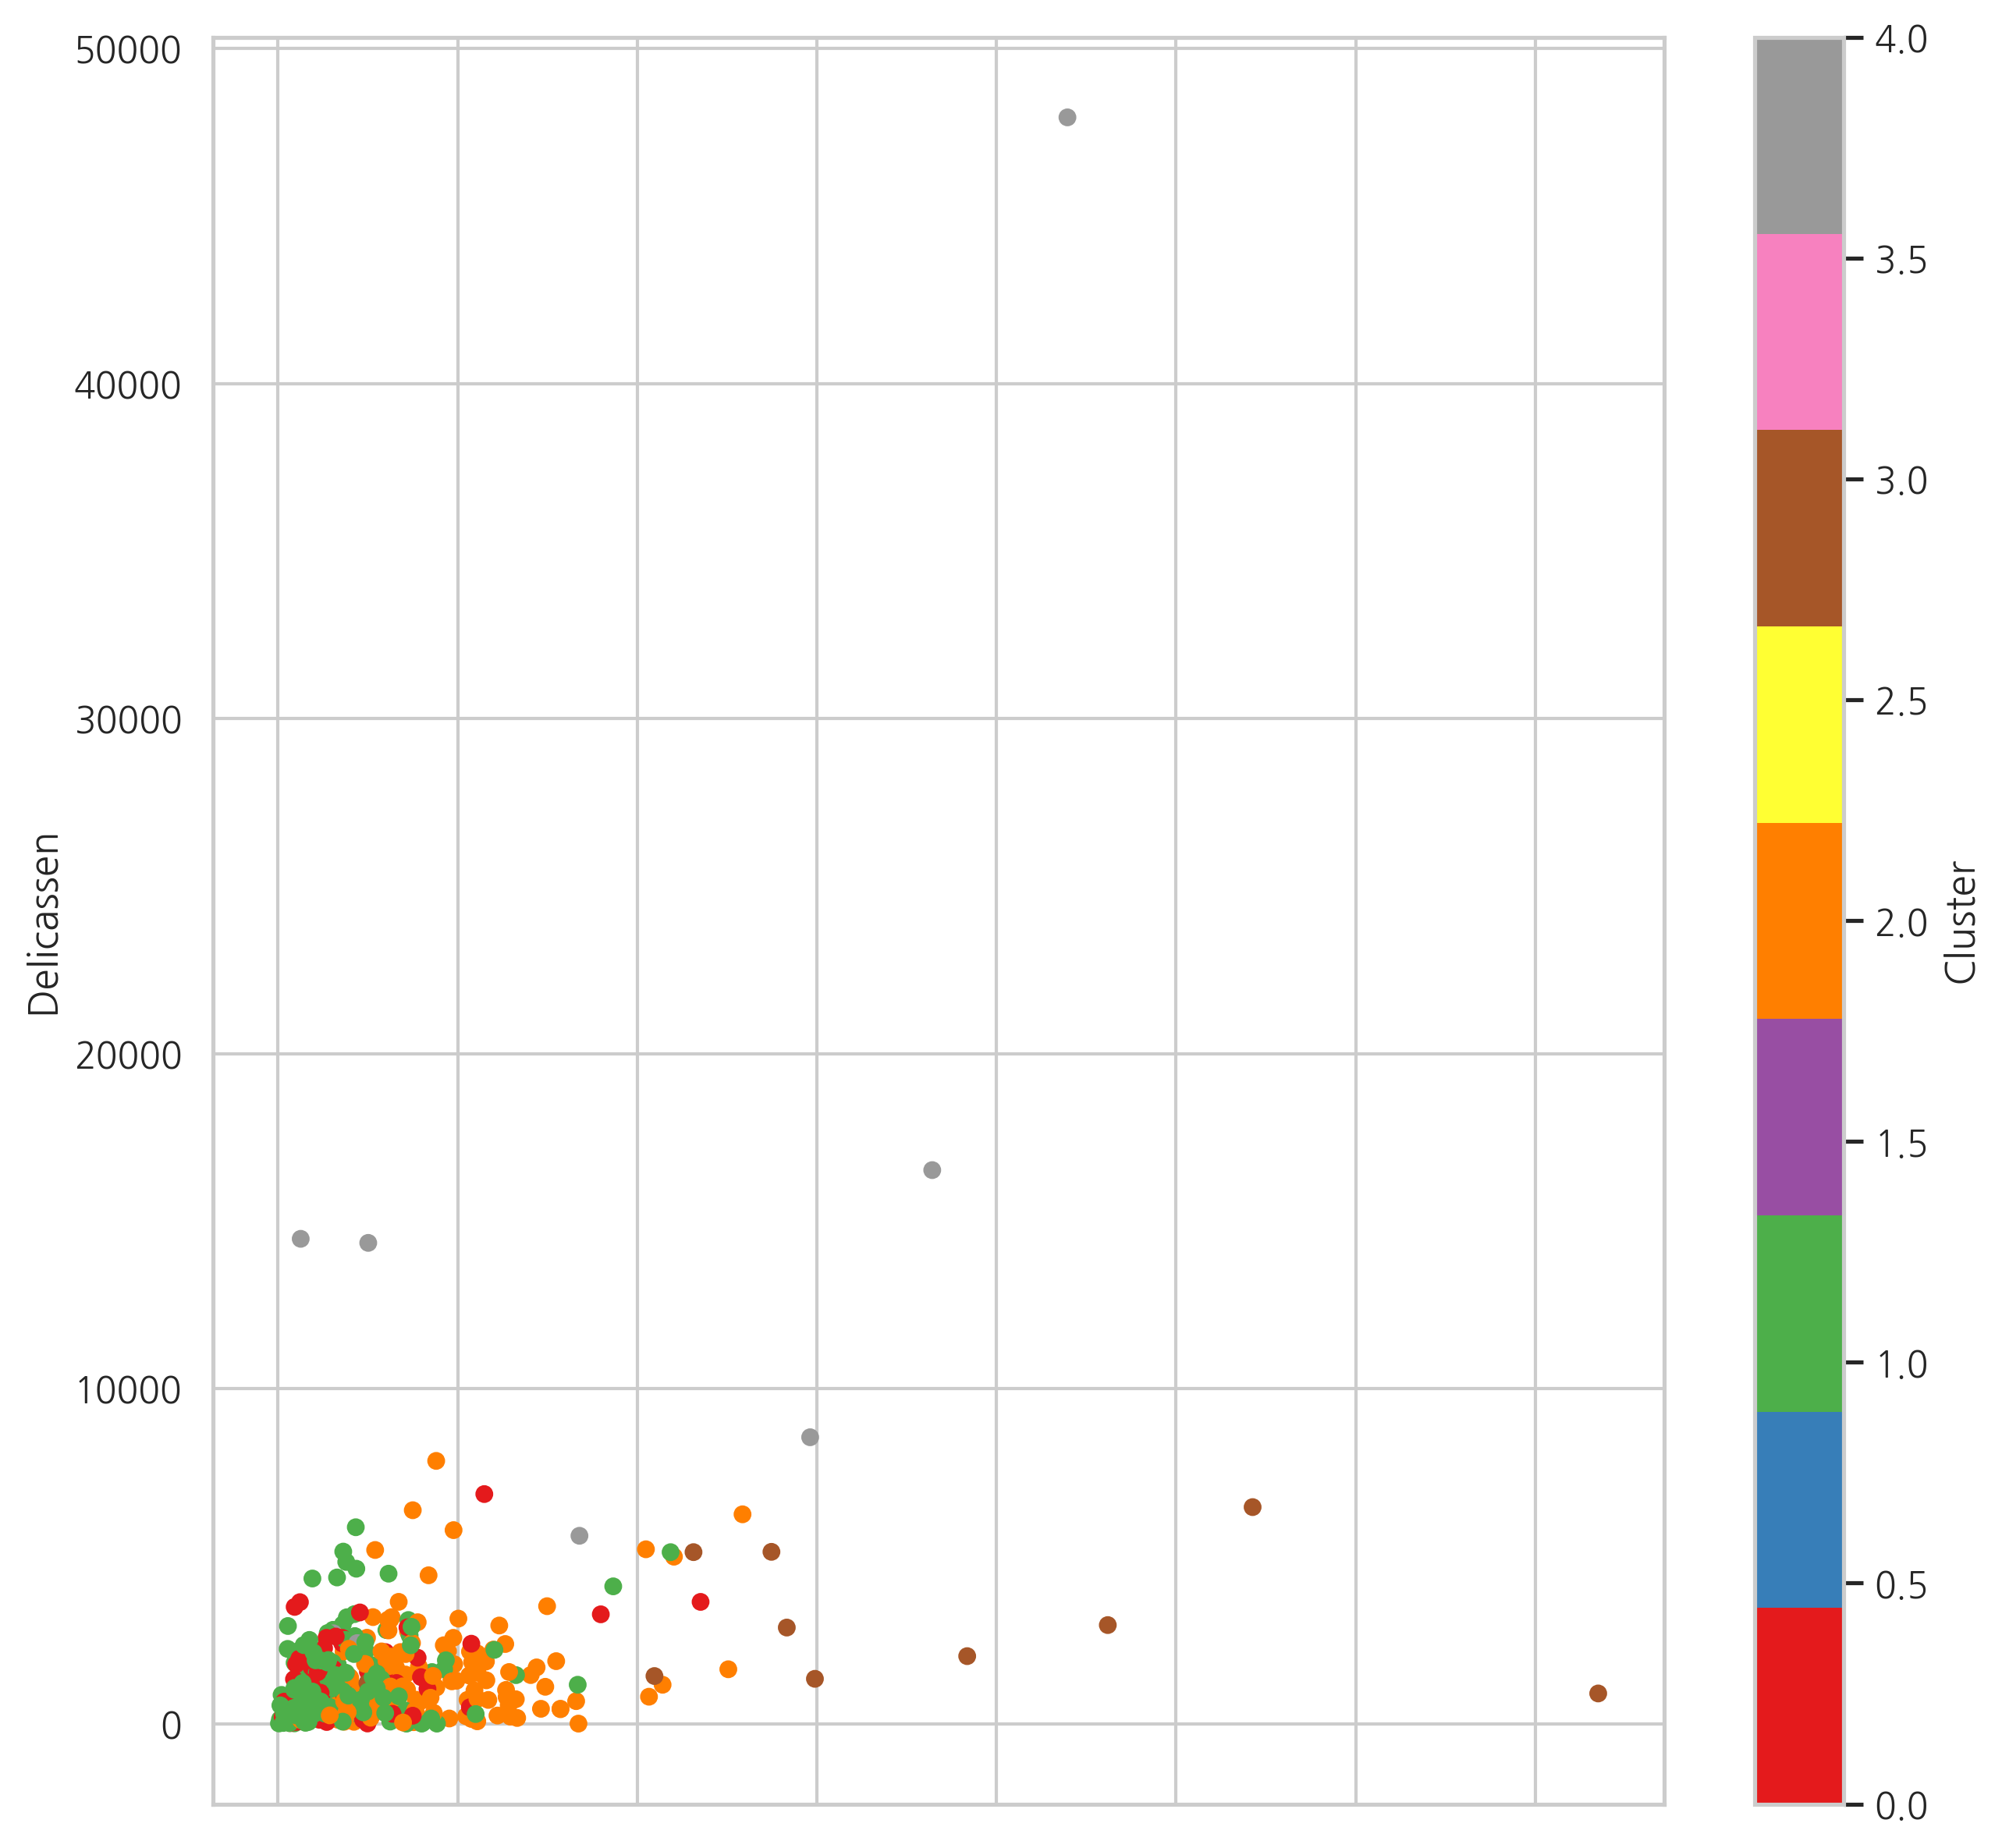

In [17]:
# 그래프로 표현 - 시각화
df.plot(kind='scatter', x='Grocery', y='Frozen',c='Cluster',cmap='Set1',colorbar=False, figsize=(10,10))
df.plot(kind='scatter', x='Milk', y='Delicassen',c='Cluster',cmap='Set1',colorbar=True,figsize=(10,10))
plt.show()
plt.close()

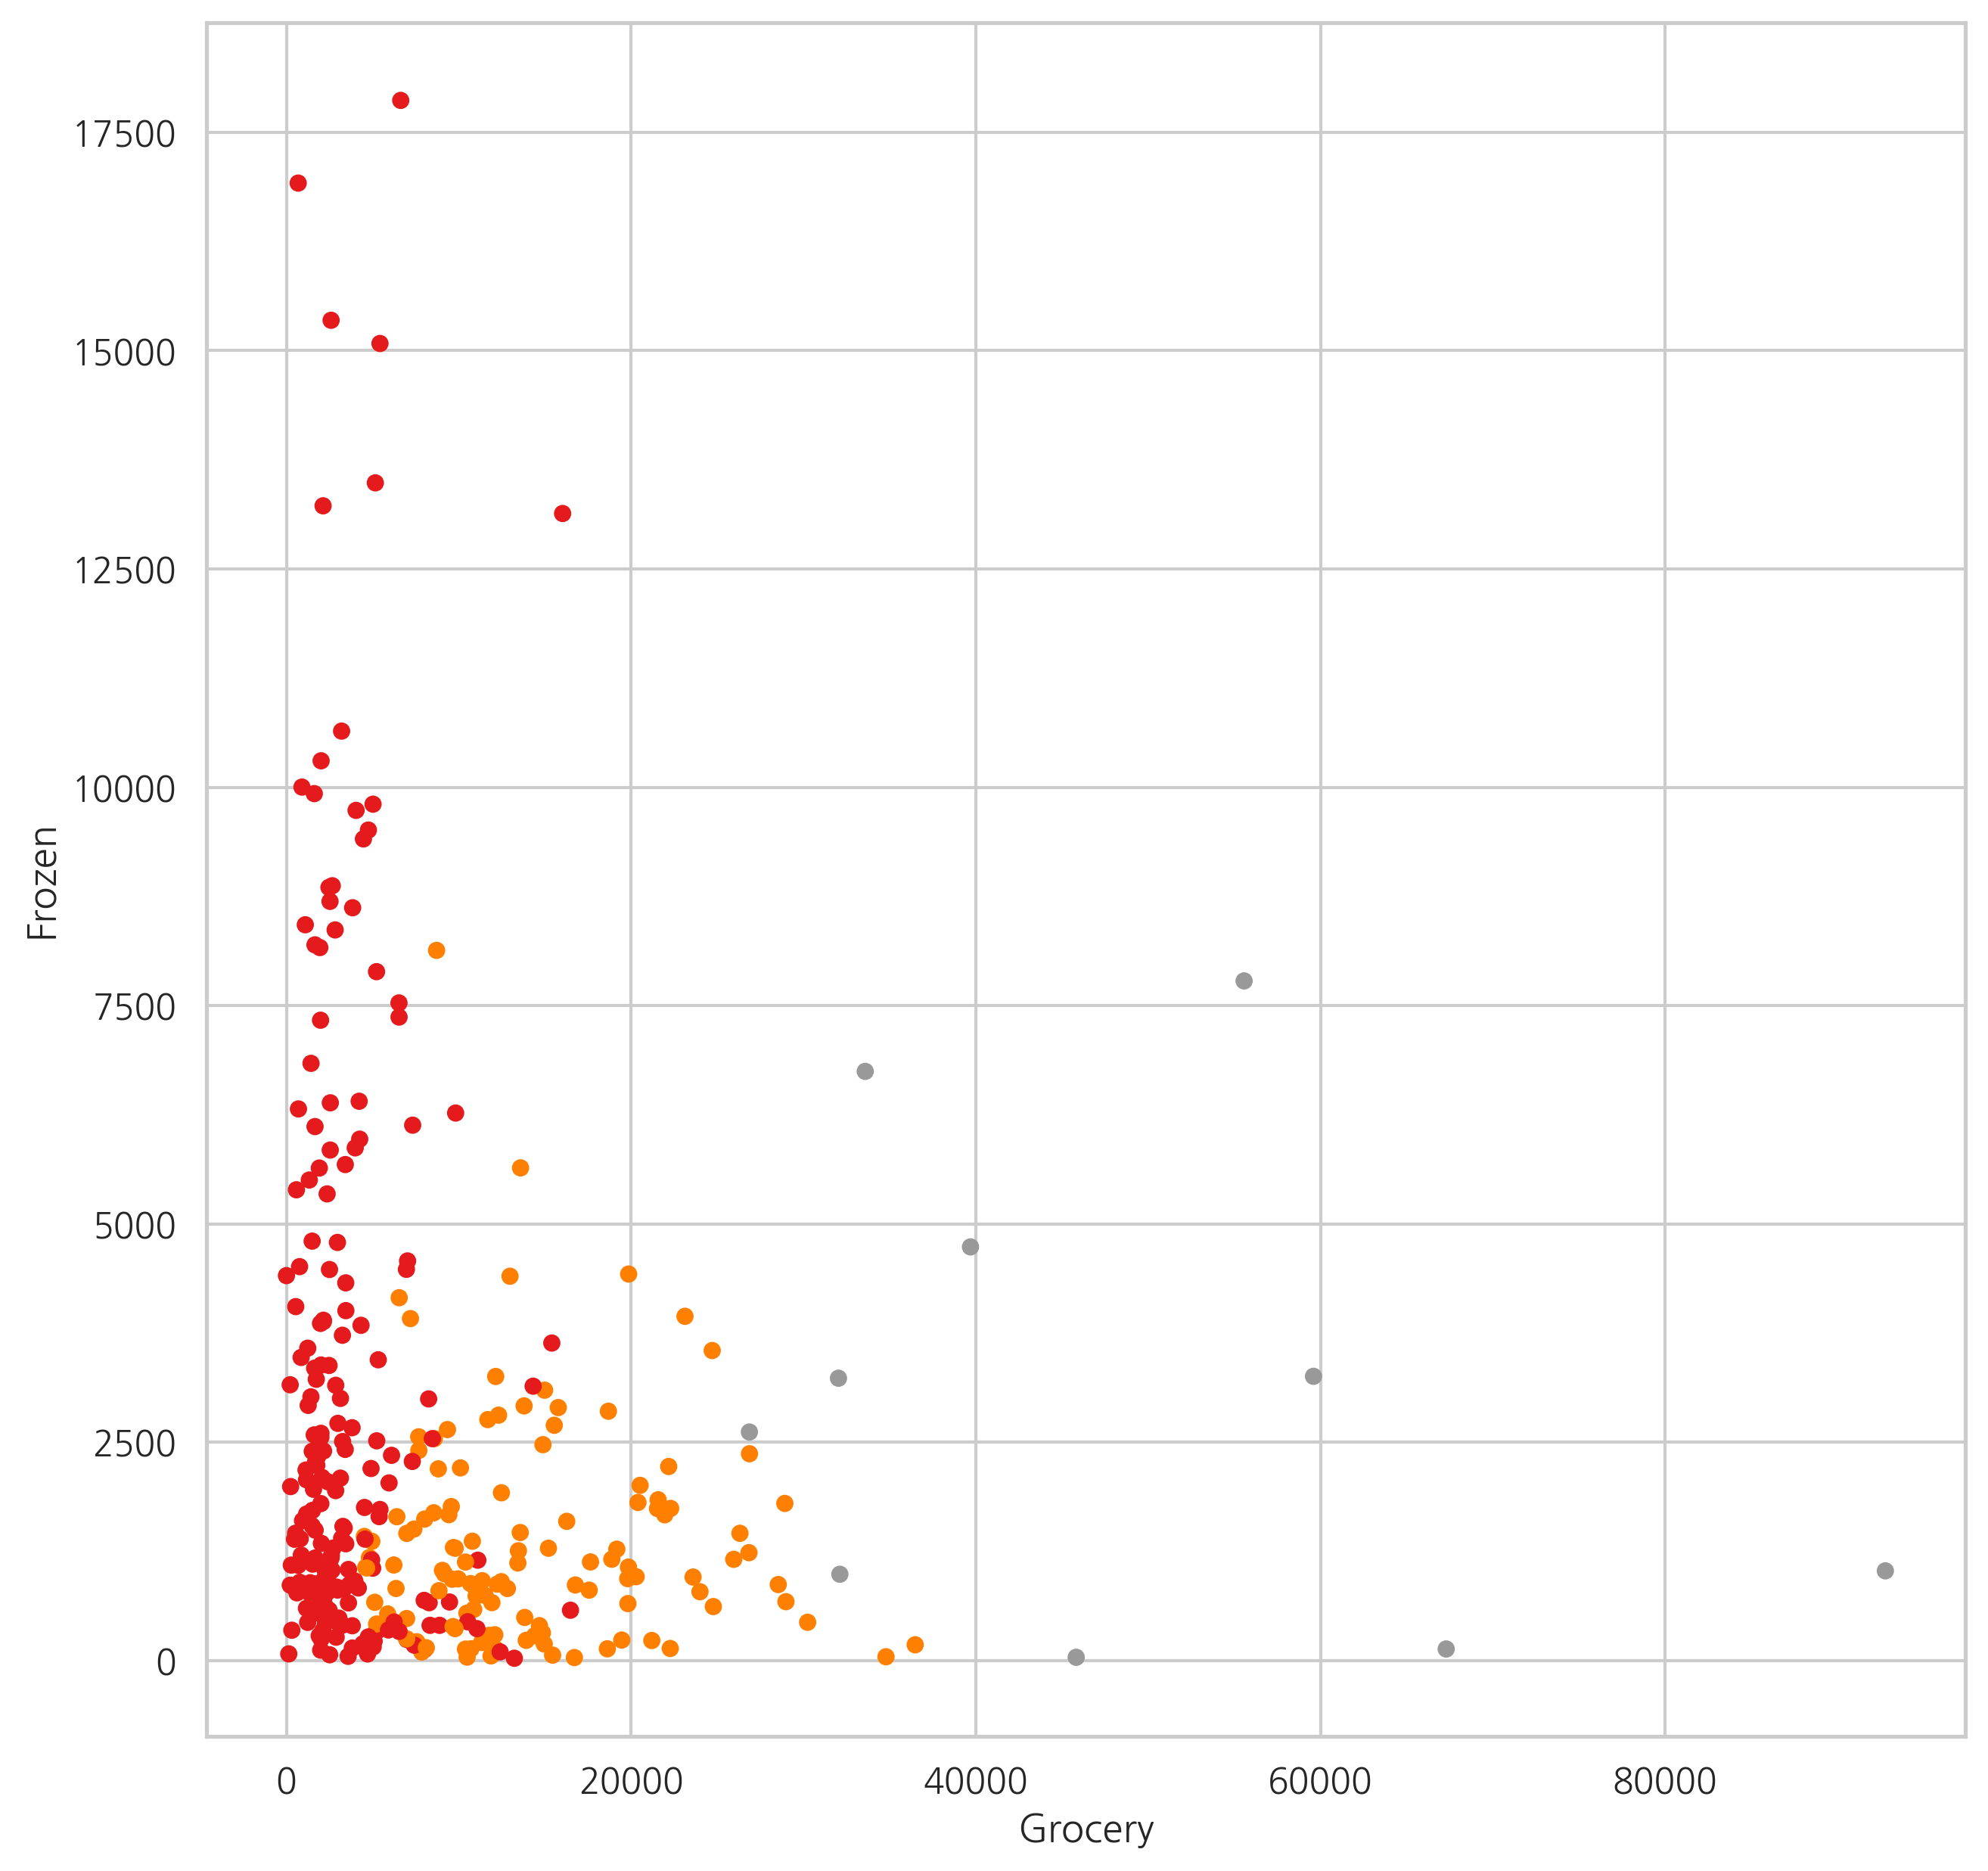

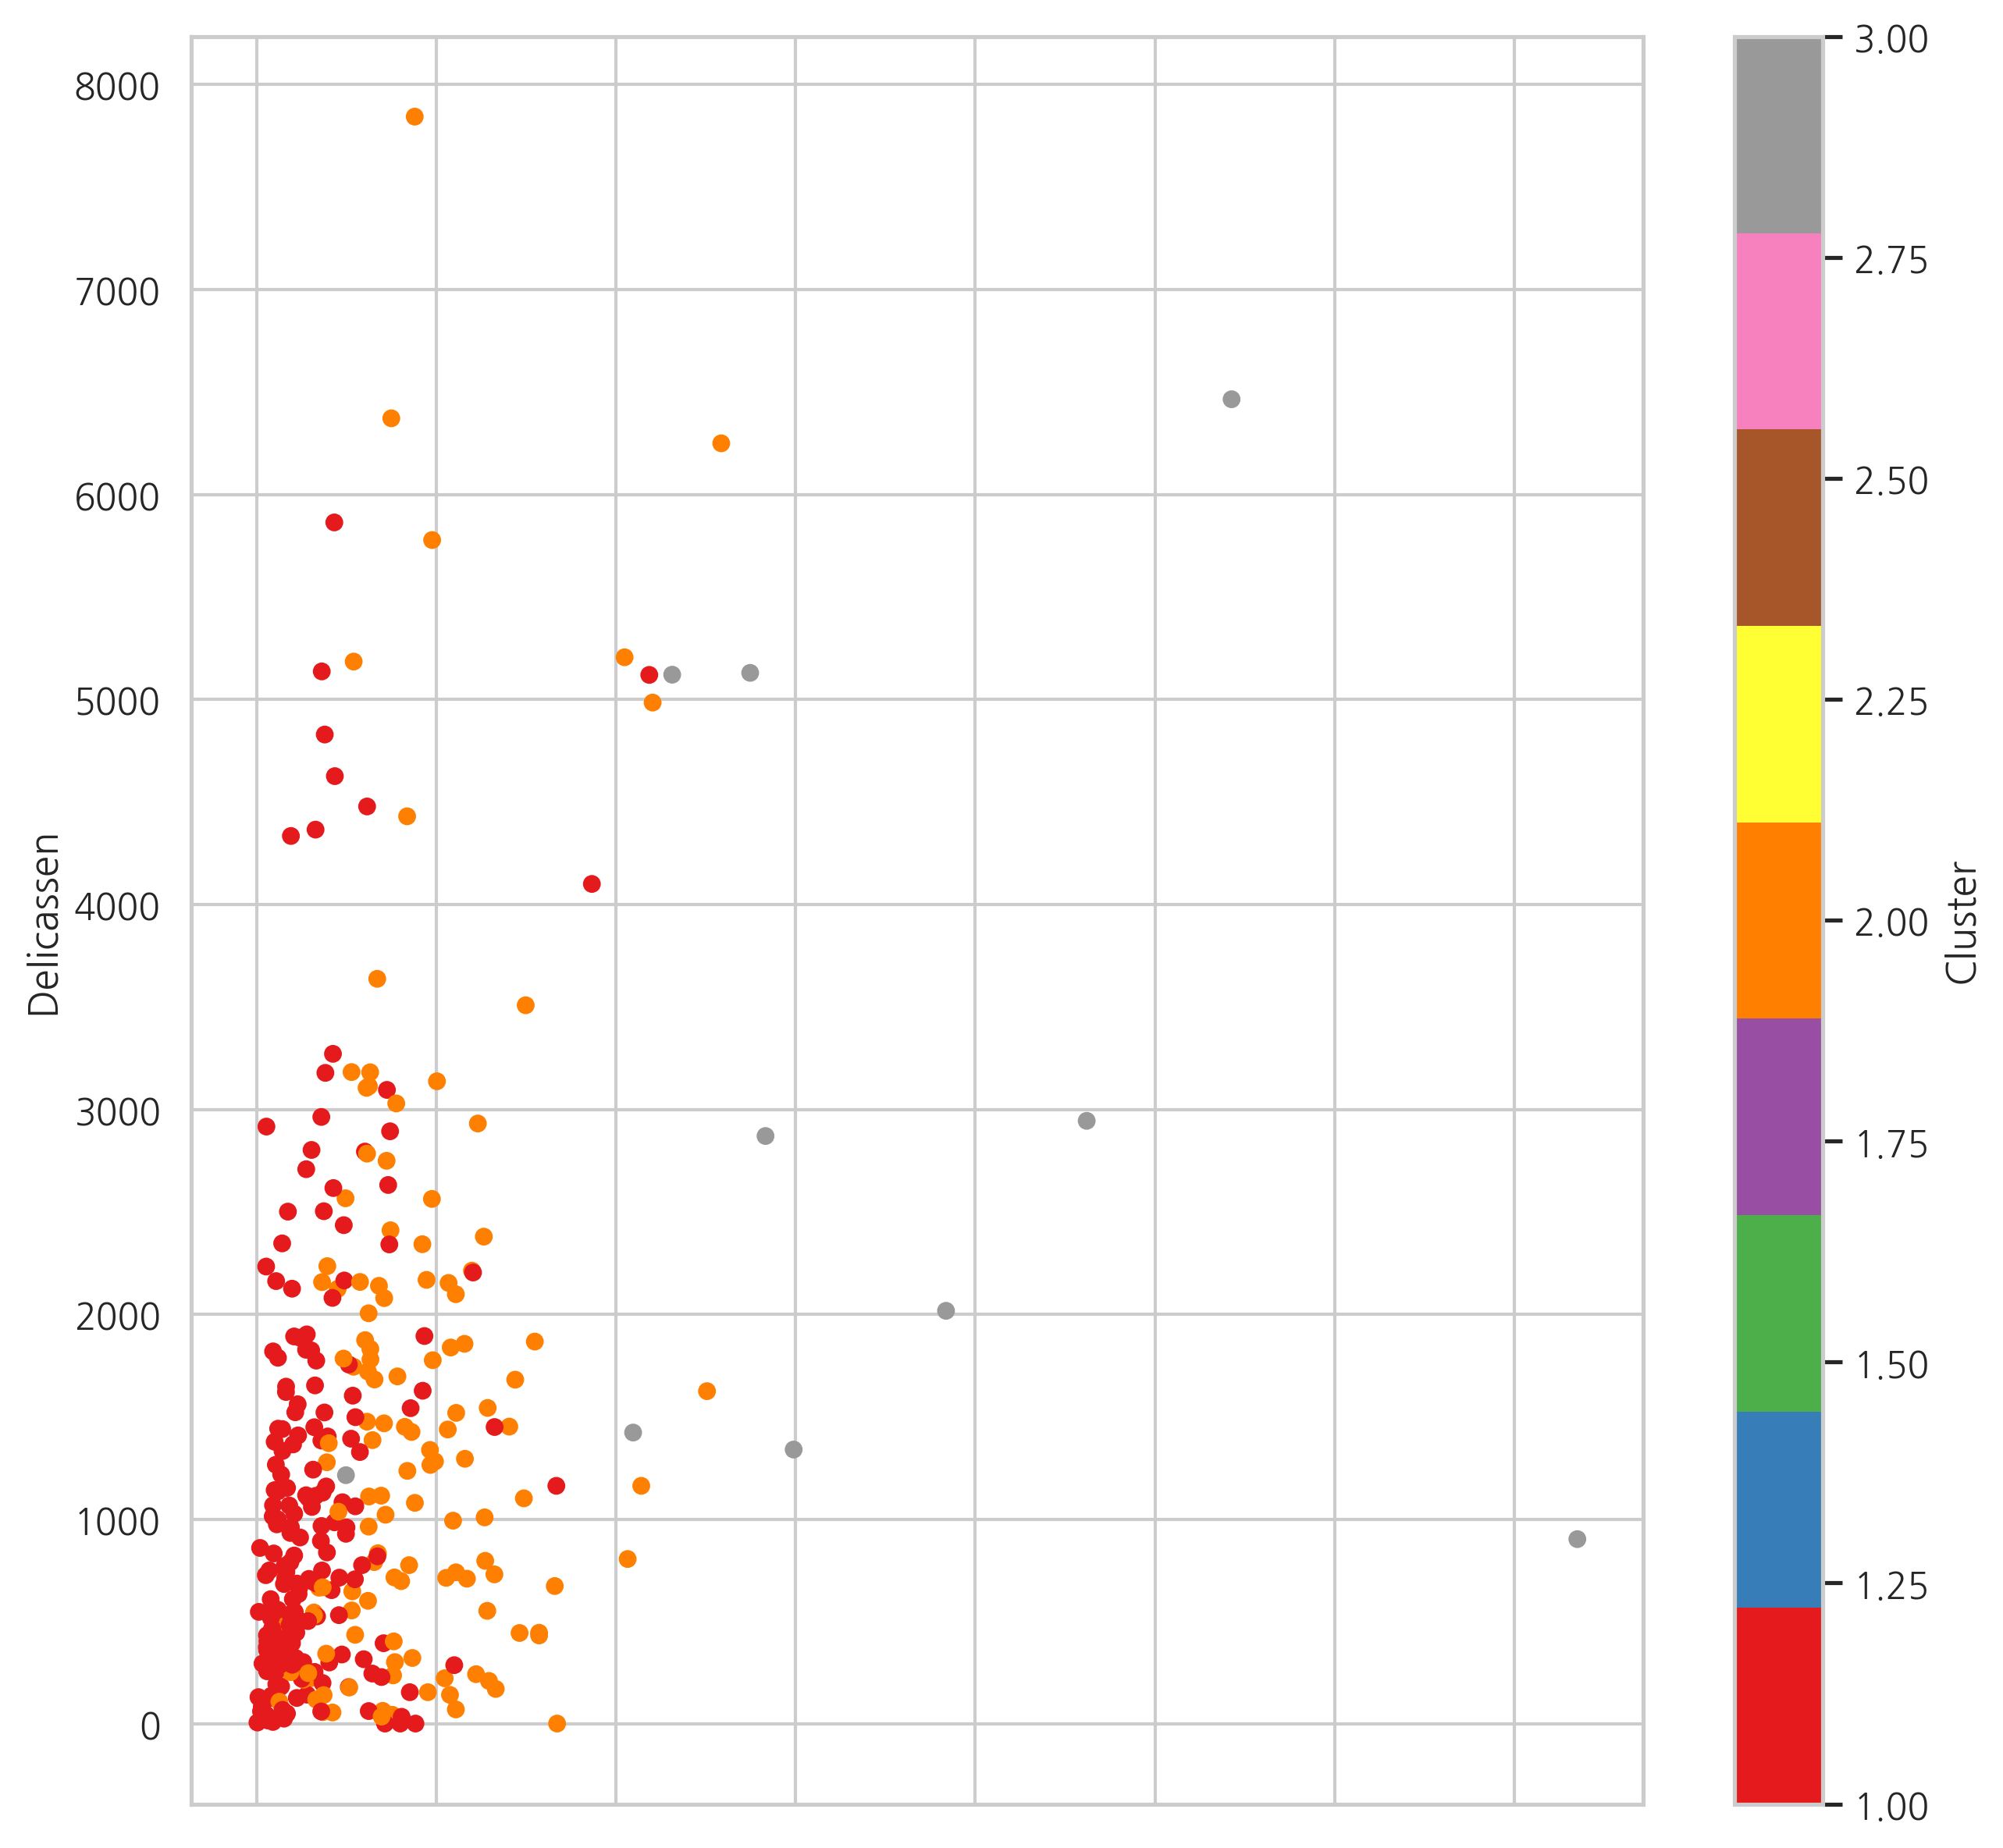

In [18]:
# 큰값으로 구성된 클러스터(0, 4) 제외 - 값이 몰려 있는 구간을 자세하게 분석
mask = (df['Cluster'] == 0) | (df['Cluster'] == 4)
ndf = df[~mask]

ndf.plot(kind='scatter', x='Grocery', y='Frozen',c='Cluster',cmap='Set1',colorbar=False, figsize=(10,10))
ndf.plot(kind='scatter', x='Milk', y='Delicassen',c='Cluster',cmap='Set1',colorbar=True,figsize=(10,10))
plt.show()
plt.close()